In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\Submission.csv
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\fer2013\fer2013\fer2013.bib
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\fer2013\fer2013\fer2013.csv
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\fer2013\fer2013\README
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\model\5LabelModel.h5
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\model\FER_Model.h5
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\model\FER_ModelTest.h5
C:/Users/User/Downloads/FYP Emotion Recognition/archive (1)\model\saran.tflite


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical  # Corrected import


In [64]:
# Temporary patch to use numpy's interp instead of scipy's interp
import scipy
scipy.interp = lambda *args, **kwargs: getattr(np, 'interp')(*args, **kwargs)

# Now import scikitplot
import scikitplot as skplt

# Example usage of interpolation from numpy
from numpy import interp

In [65]:
import os
import pandas as pd
 
# Define the root directory
root_dir = 'archive'
 
# Initialize empty lists to store file names and labels
file_names = []
labels = []
 
# Use os.walk to traverse the directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        # Construct the full file path
        file_path = os.path.join(dirpath, file)
        # Extract the label from the directory path
        label = os.path.basename(os.path.dirname(file_path))
        # Append the file path and label to the respective lists
        file_names.append(file_path)
        labels.append(label)
 
# Print the total number of file names and labels
print(len(file_names), len(labels))
 
# Create a pandas dataframe from the collected file names and labels
df = pd.DataFrame({'image': file_names, 'label': labels})
print(df.shape)

71838 71838
(71838, 2)


In [66]:
df.head()

,image,label
0,archive\images\images\train\angry\0.jpg,angry
1,archive\images\images\train\angry\1.jpg,angry
2,archive\images\images\train\angry\10.jpg,angry
3,archive\images\images\train\angry\10002.jpg,angry
4,archive\images\images\train\angry\10016.jpg,angry


In [67]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [68]:
# Count occurrences of each label
label_counts = df['label'].value_counts()

# Print label counts
print("Label Counts:")
print(label_counts)


Label Counts:
label
happy       18010
neutral     12396
sad         12186
fear        10242
angry        9906
surprise     8004
disgust      1094
Name: count, dtype: int64


In [69]:
print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


C:\Users\User\AppData\Local\Temp\ipykernel_29260\25937063.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


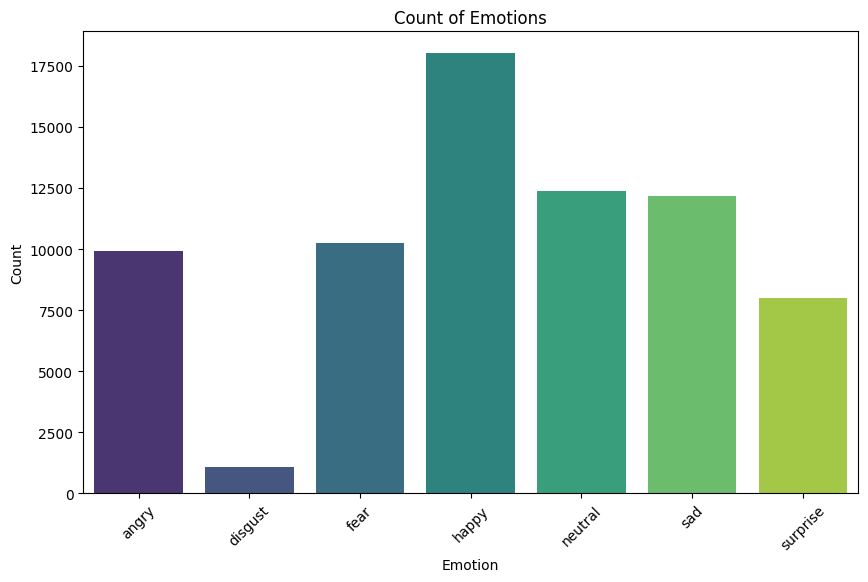

In [70]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Assuming df is your pandas DataFrame with 'label' column
plt.figure(figsize=(10, 6))  # Adjust the size of the plot
sns.countplot(x='label', data=df, palette="viridis")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.xlabel('Emotion')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Count of Emotions')  # Title of the plot
plt.show()


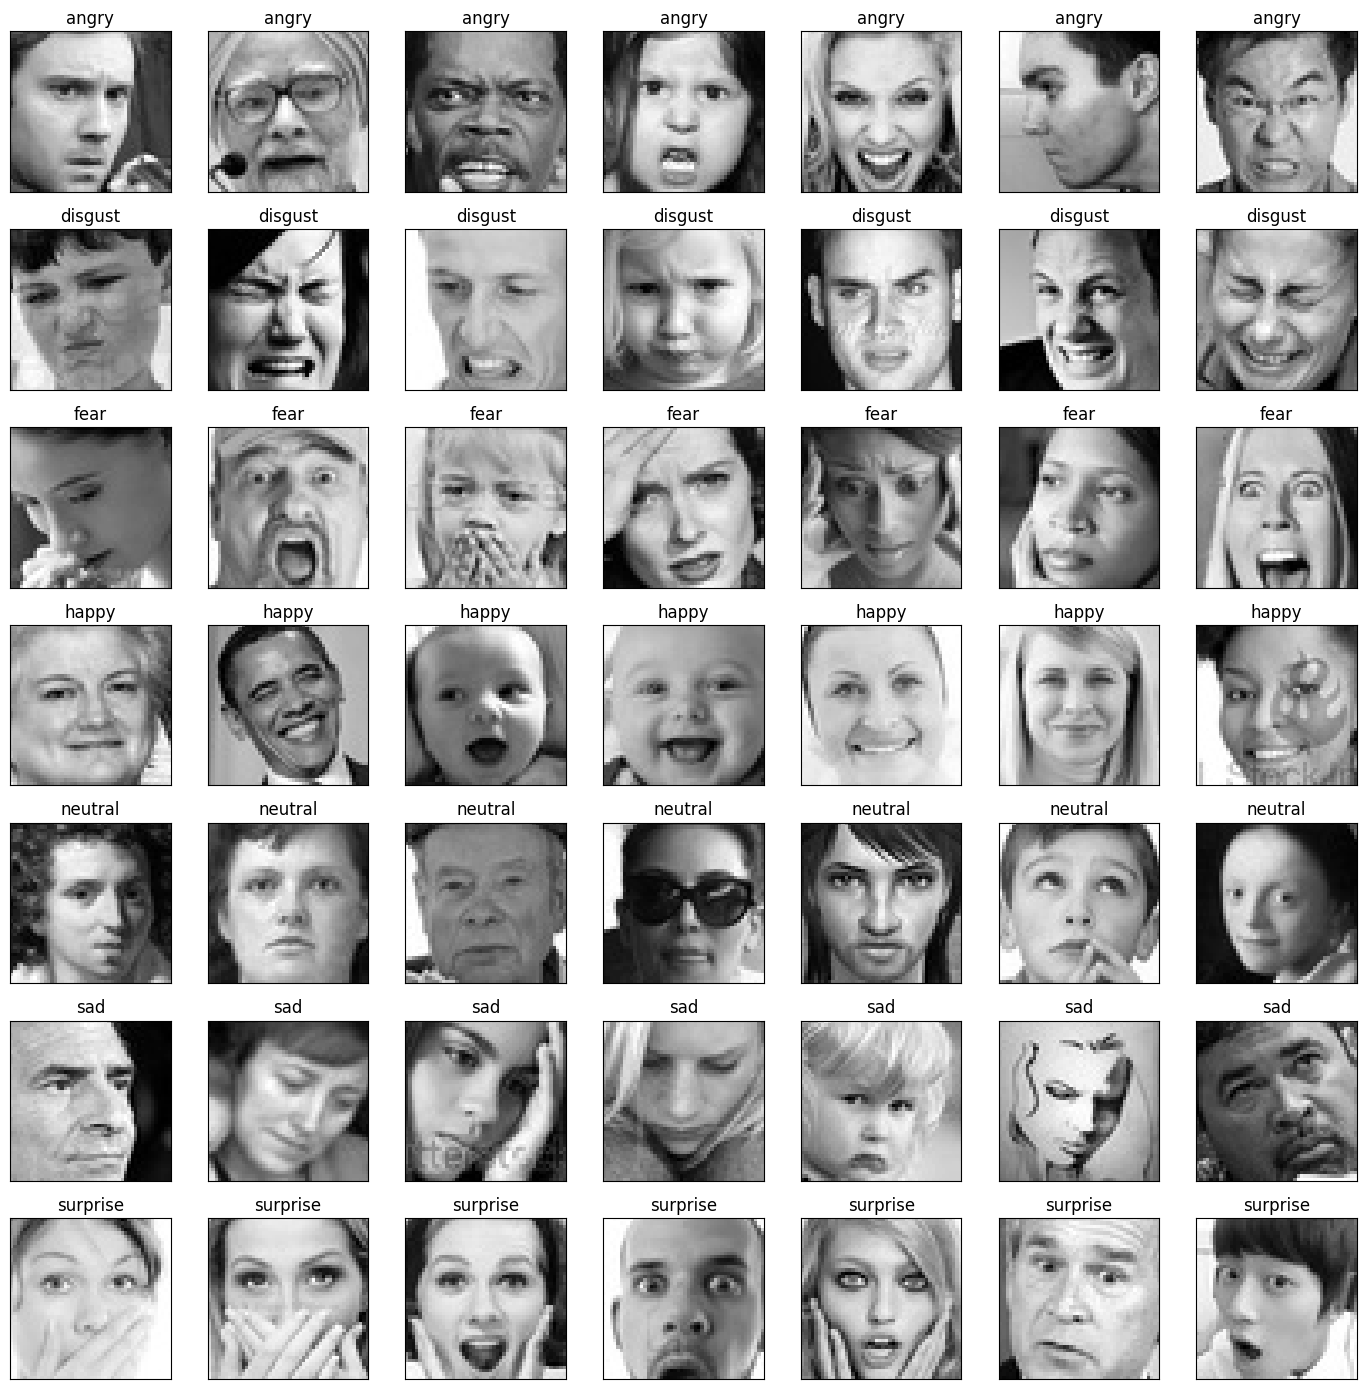

In [71]:
import matplotlib.pyplot as plt  # Import pyplot from Matplotlib
from PIL import Image  # Import Image from PIL

# Define the number of images per label to display
num_images_per_label = 7

# Create a figure object
fig = plt.figure(1, (14, 14))

k = 0
# Iterate through sorted unique labels
for label in sorted(df.label.unique()):
    # Filter DataFrame for the current label
    df_label = df[df.label == label]
    
    # Plot up to num_images_per_label images for the current label
    for j in range(min(num_images_per_label, len(df_label))):
        # Load the image from the file path
        img_path = df_label.image.iloc[j]
        img = Image.open(img_path)
        
        # Convert image to grayscale if needed
        img = img.convert('L')
        
        # Add the image to the subplot
        ax = plt.subplot(len(df.label.unique()), num_images_per_label, k + 1)
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label)
        
        k += 1

plt.tight_layout()
plt.show()  # Display the plot


In [72]:
INTERESTED_LABELS = [0, 1, 2, 3, 4, 5, 6]

In [73]:
print(df['label'].unique())


['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [74]:
# Print INTERESTED_LABELS to verify its content
print("INTERESTED_LABELS:", INTERESTED_LABELS)


INTERESTED_LABELS: [0, 1, 2, 3, 4, 5, 6]


In [75]:
print(df.columns)


Index(['image', 'label'], dtype='object')


In [76]:
# Define the list of interested labels
INTERESTED_LABELS = ['happy', 'sad', 'angry', 'neutral', 'disgust', 'fear', 'surprise']  # Update with actual labels

# Filter the DataFrame to include only rows where the label is in INTERESTED_LABELS
df = df[df['label'].isin(INTERESTED_LABELS)]

# Print the shape of the filtered DataFrame
print(df.shape)



(71838, 2)


In [77]:
from PIL import Image
import numpy as np

# Define the target image size
img_width, img_height = 48, 48

# Initialize empty lists to store image data
image_data = []

# Iterate through the DataFrame and load images
for img_path in df['image']:
    # Load and preprocess the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((img_width, img_height))  # Resize to target dimensions
    img_array = np.array(img, dtype='float32')  # Convert to NumPy array
    
    # Normalize the image
    img_array /= 255.0
    
    # Append the image to the list
    image_data.append(img_array)

# Convert list to NumPy array
img_array = np.array(image_data)

# Print the shape of the resulting array
print(img_array.shape)


(71838, 48, 48)


In [78]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the labels from the DataFrame
img_labels = le.fit_transform(df.label)  # Change df.emotion to df.label

# Convert labels to categorical format
img_labels = to_categorical(img_labels)

# Print the shape of the encoded labels
print(img_labels.shape)


(71838, 7)


In [79]:
unique_labels = df.label.unique()
print("Unique labels in the dataset:", unique_labels)


Unique labels in the dataset: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [80]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((64654, 48, 48), (7184, 48, 48), (64654, 7), (7184, 7))

In [82]:
del df
del img_array
del img_labels

In [83]:
# Adjust the code if images are grayscale
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = 1  # Single channel for grayscale images
num_classes = y_train.shape[1]


In [84]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


In [86]:

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_valid_scaled = scaler.transform(X_valid_flat)

In [87]:


# Initialize Logistic Regression with more iterations and alternative solver
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

# Train the model
log_reg.fit(X_train_scaled, np.argmax(y_train, axis=1))

LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

In [88]:

# Predict on validation data
y_pred = log_reg.predict(X_valid_scaled)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(np.argmax(y_valid, axis=1), y_pred))
print("Accuracy Score:")
print(accuracy_score(np.argmax(y_valid, axis=1), y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.27      0.31       991
           1       0.53      0.22      0.31       109
           2       0.32      0.25      0.28      1024
           3       0.48      0.64      0.55      1801
           4       0.37      0.35      0.36      1240
           5       0.34      0.33      0.34      1219
           6       0.51      0.52      0.52       800

    accuracy                           0.41      7184
   macro avg       0.42      0.37      0.38      7184
weighted avg       0.40      0.41      0.40      7184

Accuracy Score:
0.4132795100222717


In [89]:
# Predict on validation data
y_pred = log_reg.predict(X_valid_scaled)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(np.argmax(y_valid, axis=1), y_pred))
print("Accuracy Score:")
print(accuracy_score(np.argmax(y_valid, axis=1), y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.27      0.31       991
           1       0.53      0.22      0.31       109
           2       0.32      0.25      0.28      1024
           3       0.48      0.64      0.55      1801
           4       0.37      0.35      0.36      1240
           5       0.34      0.33      0.34      1219
           6       0.51      0.52      0.52       800

    accuracy                           0.41      7184
   macro avg       0.42      0.37      0.38      7184
weighted avg       0.40      0.41      0.40      7184

Accuracy Score:
0.4132795100222717
